# Iris-DB mit Entscheidungsbäumen

Als weitere Möglichkeit für die Bestimmung von Iris-Pflanzen bietet sich ein __Entscheidungsbaum__ an. 

Bei unserer "manuellen" Lösung haben wir anfangs auf gewissen Maße geschaut, und uns bei einer bestimmten Form der Petal-Blätter dirkt für Iris-setosa entschieden. Ansomnsten haben wir weitere Unterscheidungen getroffen.

Genau so arbeitet ein Entscheidungsbaum. Man untersucht die Daten auf bestimmt Bedingungen und läuft die verschiedenen Knoten bis zum einem Ende (einem _Blatt_) hindurch, der dann das Ergebnis liefert.

Wir implementieren einen Entscheidungbaum mit Hilfe von `sklearn`.

## Laden und Vorbereiten der Daten

Wir verwenden den Datensatz aus `sklearn`from sklearn. Um die Güte des Entscheidungsbaums prüfen zu können, legen wir einige Daten als Test-Daten beiseite.


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame = True)
X, y = iris.data.values, iris.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Der Entscheidungsbaum

In der Bibliothek `sklearn` finden wir den `DecisionTreeClassifier`, den wir mit den Trainingsdaten anpassen:

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 9)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

In [8]:
y_pred = clf.predict(X_test)
print(f'predict:{y_pred}\ntarget: {y_test}')

predict:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
target: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Treffergenauigkeit: {accuracy:.1%}')

Treffergenauigkeit: 100.0%


## Visuelle Darstellung

Ein schönes Feature des `DecisionTreeClassifier` ist die Möglichkeit, ihn als Grafik darzustellen. Der Baum ist bei unserer klenen Datenmenge auch übersichtlich:

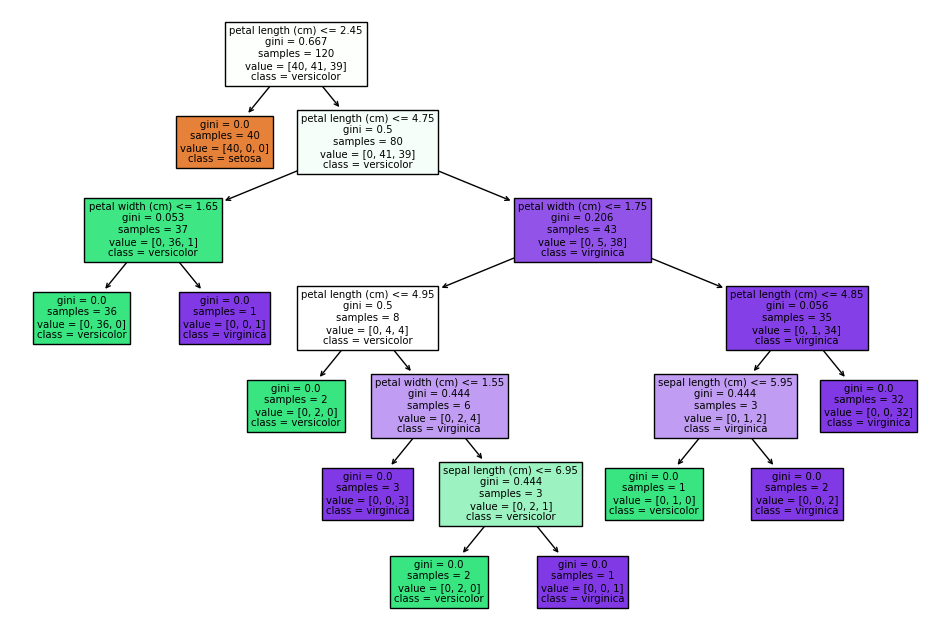

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show();

Man kann hier sehr schön verfolgen, wie die drei verschiedenen Iris-Sorten den Baum "durchlaufen". Für Iros-setoas (orange) ist schnell Schluss, und das war auch das Ergebnis unserer Analyse. Für die beiden anderen Sorten sind mehr Entscheidungen notwendig als bei uns; dafür ist die Genauigkeit auch 100 %.